马尔可夫性质（Markov property）：指一个随机过程中当前状态的概率分布，只与前一个状态有关，而与之前的状态序列无关。

布朗运动也叫作维纳过程，简单理解就是每个极小的时刻内，其变化量的变动是随机的，服从正态分布，且任何两个不重叠的时间内，变化量之间是相互独立的（也就是无记忆性，具有马尔可夫性质），布朗运动虽然连续，处处不可微分。用数学公式来表示即

$$
dS = dz = \epsilon \sqrt{dt}
$$

求出解为
$$
S_t = S_0 + \epsilon \sqrt{t}
$$


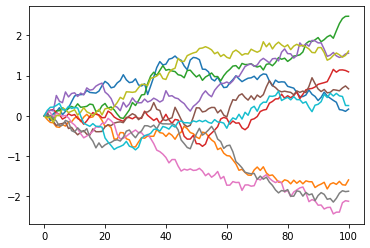

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numba
S0 = 0 #起点设置
T =1 #假定模拟一年的时间
paths = 10 #模拟路径数量
steps = 100 #将1年分为100个时间间隔
dt = T/steps #每个时间间隔的长度
S_path = np.zeros((steps+1,paths))#创建一个101行（第一行为S0）、10列的矩阵，用来准备储存模拟情况
S_path[0] = S0 #将第一行（S0）赋值为S0
rn = np.random.standard_normal((S_path.shape)) ## 一次性创建出需要的正态分布随机数，当然也可以写在循环里每次创建一个时刻的随机数
for step in range(1,steps+1):
    S_path[step] = S_path[step-1] + np.sqrt(dt)*rn[step-1]
plt.plot(S_path[:,:])
plt.show()

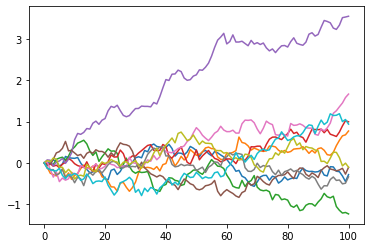

In [6]:
#封装
def standar_brownian(steps,paths,T,S0):
    dt = T / steps # 求出dt
    S_path = np.zeros((steps+1,paths))   #创建一个矩阵，用来准备储存模拟情况
    S_path[0] = S0  #起点设置
    rn = np.random.standard_normal(S_path.shape) # 一次性创建出需要的正态分布随机数，当然也可以写在循环里每次创建一个时刻的随机数
    for step in range(1,steps+1):
        S_path[step] = S_path[step - 1] + rn[step-1]*np.sqrt(dt)
    plt.plot(S_path[:,:])
    plt.show()
    return S_path
S_path = standar_brownian(steps = 100,paths = 10,T = 1,S0 = 0)

广义布朗运动:广义的布朗运动是在标准布朗运动的基础上增加漂移率a和方差率b，这里a和b均为常数，即不随时间变化而变化，具体如下：
$$
dS = adt+b\epsilon \sqrt{dt}
$$

因而dS服从正态分布$N(adt,b^2dt)$,可以求出t时刻：
$$
S_t = S_0 + at+b\epsilon \sqrt{t}
$$

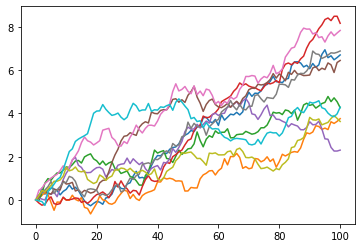

In [3]:
#  广义的布朗运动
def brownian(steps,paths,T,S0,a,b):
    dt = T / steps # 求出dt
    S_path = np.zeros((steps+1,paths))   #创建一个矩阵，用来准备储存模拟情况
    S_path[0] = S0  #起点设置
    rn = np.random.standard_normal(S_path.shape) # 一次性创建出需要的正态分布随机数，当然也可以写在循环里每次创建一个时刻的随机数
    for step in range(1,steps+1):
        S_path[step] = S_path[step - 1] + a*dt + b* rn[step-1]*np.sqrt(dt) # 和标准布朗运动的区别就在这一行
    plt.plot(S_path[:,:])
    plt.show()
    return S_path
S_path = brownian(steps = 100,paths = 10,T = 1,S0 = 0,a = 5, b = 2)

几何布朗运动：在实际过程中：
- 随着股价S的变化，漂移率也会变化（预期收益率作为固定的漂移项更合理）
- 此外S要为正数，不能为负数。

因此使用几何布朗运动描述股价更为合理，首先说明一下广义布朗运动的推广——伊藤过程，此时：
$$
dS = a(s,t)dt + b(s,t)dz = a(s,t)dt + b(s,t)\sqrt{dt}
$$

若令$a(s,t) = \mu S$，$b(s,t) = \sigma S$，则伊藤过程就是几何布朗运动。得到：
$$
dS = \mu S dt + \sigma S dz\\
\frac{dS}{S} = \mu dt + \sigma dz
$$

解得：
$$
S_t = S_0 * e^{(\mu - 0.5 \sigma^2)*t+\sigma*\sqrt{t}}
$$


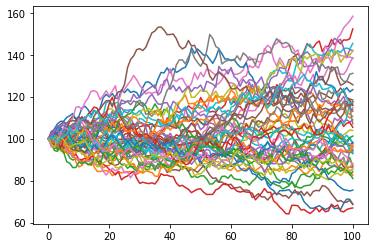

In [4]:
#  几何布朗运动
def geo_brownian(steps,paths,T,S0,u,sigma):
    dt = T / steps # 求出dt
    S_path = np.zeros((steps+1,paths))   #创建一个矩阵，用来准备储存模拟情况
    S_path[0] = S0  #起点设置
    rn = np.random.standard_normal(S_path.shape) # 一次性创建出需要的正态分布随机数，当然也可以写在循环里每次创建一个时刻的随机数
    for step in range(1,steps+1):
        S_path[step] = S_path[step - 1] * np.exp((u-0.5*sigma**2)*dt +sigma*np.sqrt(dt)*rn[step]) # 和其他布朗运动的区别就在这一行
    plt.plot(S_path[:,:])
    plt.show()
    return S_path
S_path = geo_brownian(steps = 100,paths = 50,T = 1,S0 = 100,u = 0.03, sigma = 0.2)